In [2]:
%load_ext autoreload 
%autoreload 2.

import os

try:
    os.chdir('./MantraNet')
except:
    pass

import matplotlib.pyplot as plt
import gc

from mantranet import *

from pytorch_lightning import Trainer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### I - How to use ManTraNet in evaluation mode (using pre-trained weights) ?

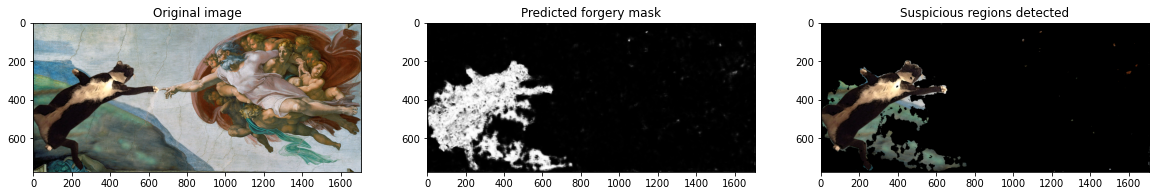

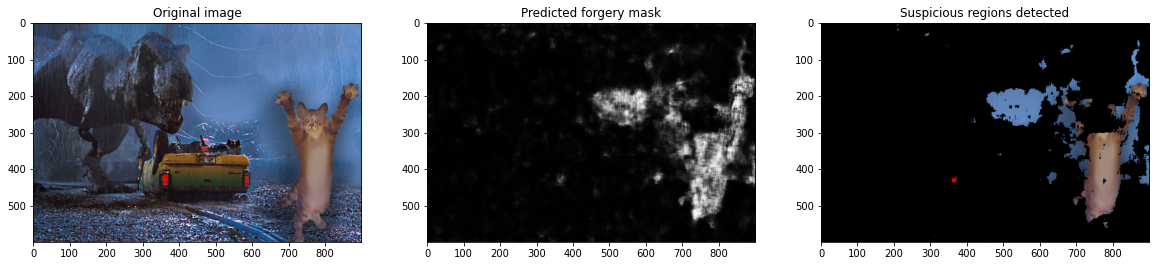

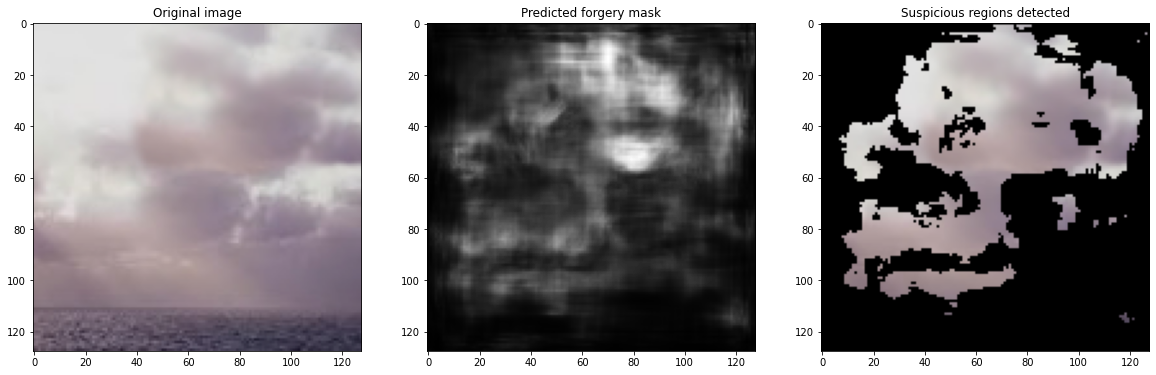

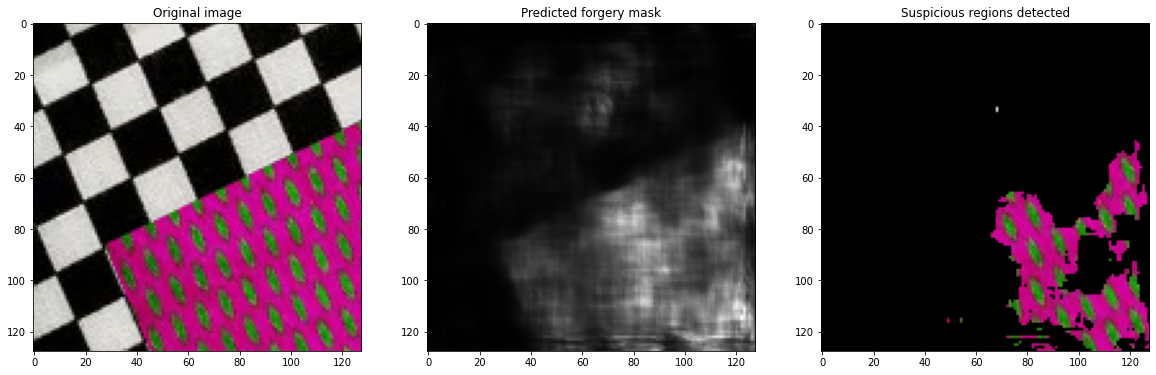

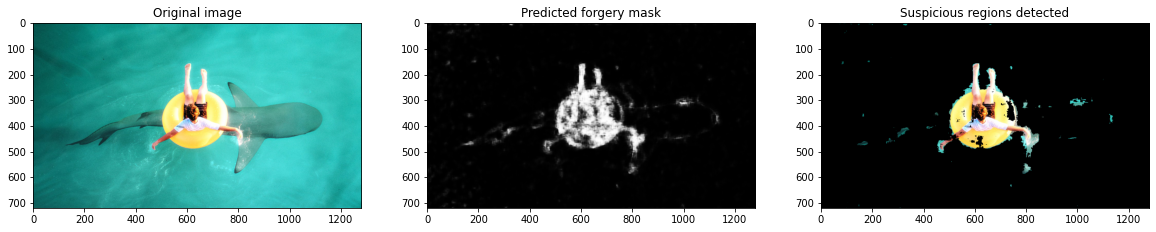

In [3]:
device='cpu' #to change if you have a GPU with at least 12Go RAM (it will save you a lot of time !)
model=pre_trained_model(weight_path='./MantraNetv4.pt',device=device)

model.eval()
for image in os.listdir('../Demo_images/'):

    plt.figure(figsize=(20,20))
    check_forgery(model,img_path=f'../Demo_images/{image}',device=device)

### II - How to train ManTraNet from the pre-trained weights ?

Following the philosophy of the paper, in order to build MantraNet one should train the Feature Extractor and the Anomaly Detector separately with specific datasets and then, compose them to finally obtain MantraNet in evaluation mode.

The authors gave details about their experimental protocol in Section **2.3** of their article. 

![](https://i.imgur.com/7vVf629.png)

However, please not that some data are not shared and that's why it is not so easy to reproduce their training.

To Simplify you things, I divided the MantraNet network into two networks that you can train separately like the authors did (IMTFE and AnomalyDetector)

In [10]:
model

MantraNet(
  (relu): ReLU()
  (IMTFE): IMTFE(
    (relu): ReLU()
    (init_conv): Conv2d(3, 4, kernel_size=(5, 5), stride=(1, 1), bias=False)
    (BayarConv2D): Conv2d(3, 3, kernel_size=(5, 5), stride=(1, 1), bias=False)
    (SRMConv2D): Conv2d(3, 9, kernel_size=(5, 5), stride=(1, 1), bias=False)
    (middle_and_last_block): ModuleList(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
      (1): ReLU()
      (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
      (3): ReLU()
      (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (5): ReLU()
      (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
      (7): ReLU()
      (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
      (9): ReLU()
      (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
      (11): ReLU()
      (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
      (13): ReLU()
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
      (15): ReLU()
      (16): Co